In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [9]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [10]:
df

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [11]:
X = df.drop('Survived',axis='columns')
y = df.Survived

In [16]:
dummies = pd.get_dummies(df.Sex)
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [56]:
X = pd.concat([df,dummies],axis='columns')

In [57]:
X.drop('Sex',axis='columns',inplace=True)

In [33]:
X.Age.isnull().sum()

177

In [59]:
X.drop('Survived',axis='columns',inplace=True)

In [72]:
X.Age = X.Age.fillna(X.Age.mean())

In [48]:
X.Age.isnull().sum()

0

In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [117]:
len(X_train)

712

In [118]:
len(X_test)

179

In [119]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [120]:
model.score(X_test,y_test)

0.8044692737430168

In [83]:
y_pred = model.predict(X_test)

In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)

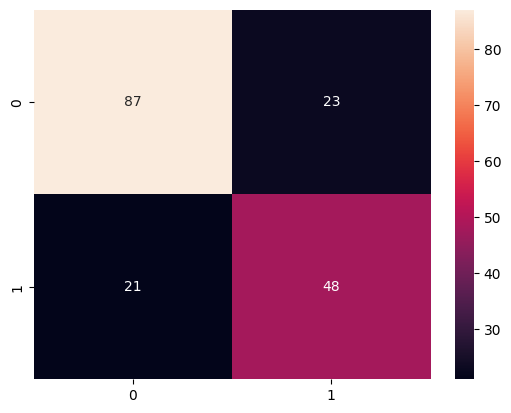

In [87]:
import seaborn as sns
sns.heatmap(cm, annot=True);

In [127]:
model.predict_proba(X_test[:10])

array([[0.98841774, 0.01158226],
       [0.97730431, 0.02269569],
       [0.03706999, 0.96293001],
       [0.98802577, 0.01197423],
       [0.98854077, 0.01145923],
       [0.9865534 , 0.0134466 ],
       [0.9888674 , 0.0111326 ],
       [0.00925138, 0.99074862],
       [0.00614627, 0.99385373],
       [0.09018326, 0.90981674]])

In [126]:
y_test[:10]

C:\Users\PC\AppData\Local\Temp\ipykernel_24400\2588316582.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:10]


749    0
178    0
792    0
57     0
519    0
60     0
661    0
309    1
1      1
610    0
Name: Survived, dtype: int64

# Spam or No Spam

In [204]:
import pandas as pd

In [205]:
df = pd.read_csv('Spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [206]:
df['spam']=df['Category'].apply(lambda a: 1 if a=='spam' else 0)

In [207]:
df

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [208]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.Message,df.spam,test_size=.2)

In [209]:
x_train.shape

(4457,)

In [210]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train.values)
x_train_count.toarray()[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
len(x_train_count.toarray()[0])

7767

In [34]:
x_train_count.shape

(4457, 7767)

In [36]:
x_train.shape

(4457,)

In [55]:
x_train_count.shape

(4457, 7767)

In [56]:
y_train.shape

(4457,)

In [37]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB()

In [52]:
model.score(x_train_count,y_test)

ValueError: Found input variables with inconsistent numbers of samples: [1115, 4457]

In [38]:
emails = [
    "hey mohan can we together to watch footbaal game tommorow",
    "upto 20% discount parking, exclusive offer just for you. Dont miss this reward"
]
emails_count = cv.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [43]:
emails_count.shape

(2, 7767)

In [54]:
x_test_count = cv.transform(x_test)
model.score(x_test_count,y_test)

0.9901345291479821

In [59]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [61]:
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.9901345291479821

In [65]:
x_test

3993    Dizzamn, aight I'll ask my suitemates when I g...
3381                    Just finished. Missing you plenty
3304           It'll be tough, but I'll do what I have to
3659    R u here yet? I'm wearing blue shirt n black p...
1398    Then we wait 4 u lor... No need 2 feel bad lar...
                              ...                        
4464    He said i look pretty wif long hair wat. But i...
3428                    Haha okay... Today weekend leh...
2730    Urgent! Please call 09066612661 from your land...
2573    The house is on the water with a dock, a boat ...
5194              Ok... Take ur time n enjoy ur dinner...
Name: Message, Length: 1115, dtype: object

In [114]:
import pandas as pd

In [115]:
from sklearn.datasets import load_wine
df = load_wine()

In [116]:
dir(df)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [117]:
dt = pd.DataFrame(df.data,columns = df.feature_names)

In [118]:
dt

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dt, df.target, test_size=.2)

In [124]:
len(X_train)

142

In [126]:
len(x_test)

1115

In [127]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8888888888888888

In [131]:
from sklearn.model_selection import train_test_split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(dt, df.target, test_size=.2)

In [132]:

from sklearn.naive_bayes import MultinomialNB
mod = MultinomialNB()
mod.fit(X_train_m,y_train_m)
mod.score(X_test_m,y_test_m)

0.75